In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits


# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical

In [3]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
# To track the splits so that analysis of errors can be done.
indices = np.arange(X_digits.shape[0]) 

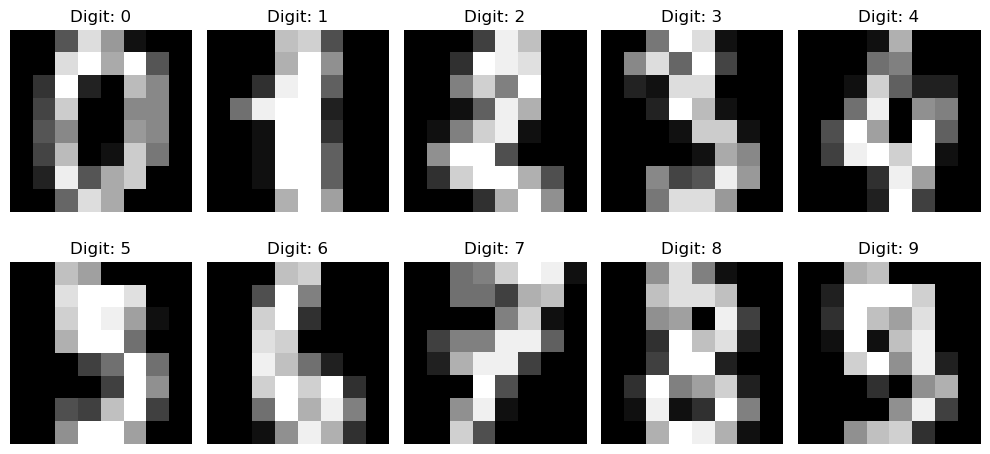

Digits dataset: 1797 samples, 64 features


In [5]:
# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()


# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

What does a single observation look like?

In [6]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Class Balance?

In [8]:
pd.Series(digits.target).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

# Prepare & Split the Data: 

Load the digits dataset (or a similar image-based dataset).

Scale or normalize features as needed (e.g., pixels in the range [0,1]) and split into training and testing sets.

In [9]:
X_digits = X_digits / 16 # To scale the pixels to 0-1.

In [10]:
X_train_val, X_test, y_train_val, y_test,idx_train_val,idx_test = train_test_split(X_digits, y_digits,indices, test_size=0.2,random_state=42)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25,random_state=42)

# Build & Train an MLP:

Create a sequential model with hidden layers of reasonable size (e.g., 128, 64 units).

Use an activation function (relu, tanh, or sigmoid) and monitor validation accuracy to see which yields the best result.

We will use relu activation functions for all the hidden layers as is practice.  Since we are dealing with a multi-class problem, the output layer is ten wide with a softmax activation function.

In [12]:
model = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Choice of compiler is pretty straight forward.

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2947 - loss: 2.1553 - val_accuracy: 0.6083 - val_loss: 1.6105
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7282 - loss: 1.3734 - val_accuracy: 0.8556 - val_loss: 0.8840
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8854 - loss: 0.7081 - val_accuracy: 0.8750 - val_loss: 0.5223
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.4127 - val_accuracy: 0.9111 - val_loss: 0.3740
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9433 - loss: 0.2847 - val_accuracy: 0.9278 - val_loss: 0.2924
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9593 - loss: 0.2155 - val_accuracy: 0.9333 - val_loss: 0.2420
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.1740 - val_accuracy: 0.9417 - val_loss: 0.2061
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.1468 - val_accuracy: 0.9528 - val_loss:

# Model Evaluation & Improvement:

Evaluate final accuracy or compute confusion matrices for classification.

Experiment with alternative hyperparameters, additional layers, or different optimizers to see how each change impacts performance.

In [14]:
predictions = model.predict(X_test).argmax(axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9555555555555556


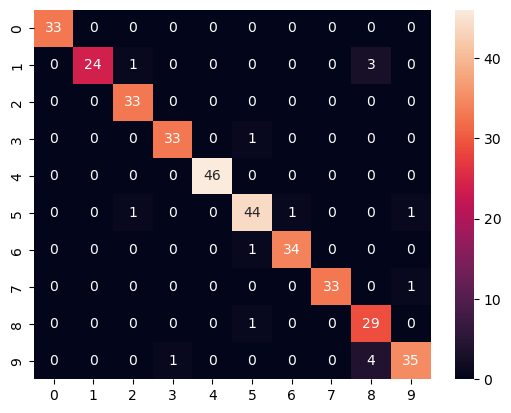

In [15]:
print(accuracy_score(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9608 - loss: 0.0994
Validation Accuracy: 95.56%


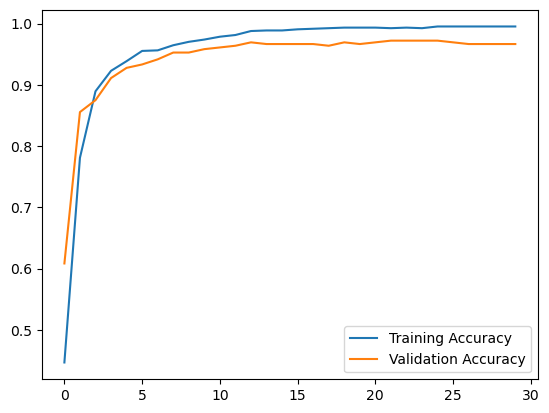

In [16]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

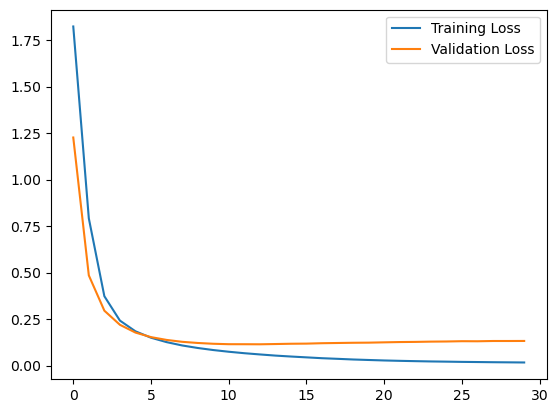

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

It is difficult to be too worried about overfitting given these plots and the fact that my accuracy score is so high on the unseen data.  Let's introduce some architecture anyways and see what happens. Specifically, introduce batch normalization and a random dropout.

In [17]:
model2 = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [18]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2611 - loss: 2.1469 - val_accuracy: 0.6917 - val_loss: 1.7763
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.9303 - val_accuracy: 0.8750 - val_loss: 1.0374
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9006 - loss: 0.4542 - val_accuracy: 0.9389 - val_loss: 0.6001
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9341 - loss: 0.2988 - val_accuracy: 0.9500 - val_loss: 0.3741
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9485 - loss: 0.2105 - val_accuracy: 0.9528 - val_loss: 0.2554
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9603 - loss: 0.1704 - val_accuracy: 0.9611 - val_loss: 0.1779
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9584 - loss: 0.1400 - val_accuracy: 0.9611 - val_loss: 0.1431
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1128 - val_accuracy: 0.9639 - val_loss:

In [19]:
predictions = model2.predict(X_test).argmax(axis=1)
print(accuracy_score(y_test,predictions))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.9722222222222222


In [20]:
val_loss, val_accuracy = model2.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.0932
Validation Accuracy: 97.22%


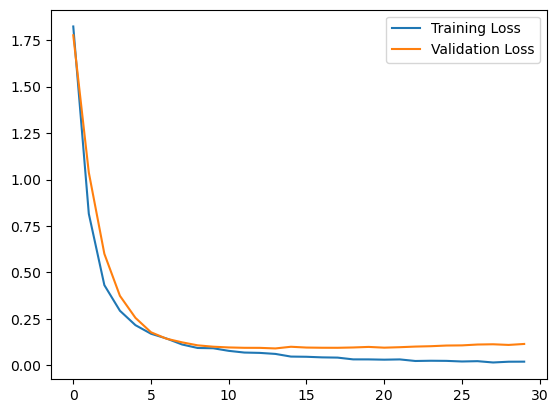

In [21]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

We actually improved the performance a bit and the validation loss takes longer to decouple from training and plateau.  So an improvement over the original model and it did not require that much more computational resources.